In [1]:
import  pandas as pd

In [2]:
data = pd.read_csv("/home/student/Downloads/SMSSpamCollection", sep ='\t', header='infer', names=['Label','SMS'])
data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.isnull().sum()

Label    0
SMS      0
dtype: int64

In [4]:
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

In [5]:
data.head()

,Label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder

/home/student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
le = LabelEncoder()
data['Label'] =le.fit_transform(data['Label'])
data

,Label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vectorizer = CountVectorizer(lowercase = True, strip_accents = 'ascii', stop_words = 'english', analyzer = 'word')

In [10]:
x = vectorizer.fit_transform(data['SMS'])

In [11]:
x.shape

(5572, 8453)

In [18]:
y = data.iloc[:,0]

In [19]:
y.shape

(5572,)

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Label', ylabel='Count'>

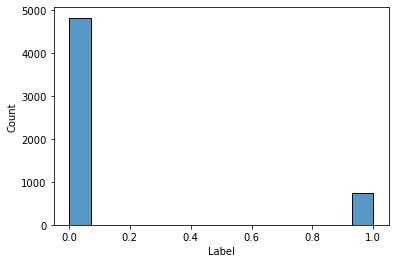

In [21]:
sns.histplot(data,x='Label')

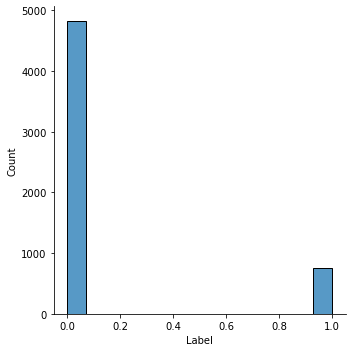

In [22]:
sns.displot(data,x='Label')

In [23]:
vectorizer.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zoom', 'zouk', 'zyada'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = data['Label']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 52) 

In [28]:
x_train.shape

(4457, 8453)

In [29]:
y_train.shape

(4457,)

In [30]:
x_test.shape

(1115, 8453)

In [31]:
y_test.shape

(1115,)

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
clf = MultinomialNB()

In [35]:
clf.fit(x_train, y_train)

MultinomialNB()

In [36]:
y_train_pred = clf.predict(x_train)

In [37]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [39]:
confusion_matrix(y_train,y_train_pred)

array([[3850,   10],
       [  14,  583]])

In [40]:
accuracy_score(y_train,y_train_pred)

0.9946152120260264

In [41]:
precision_score(y_train,y_train_pred)

0.9831365935919055

In [42]:
recall_score(y_train,y_train_pred)

0.9765494137353434

In [43]:
## for testing
y_pred = clf.predict(x_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[946,  19],
       [  9, 141]])

In [45]:
accuracy_score(y_test,y_pred)

0.9748878923766816

In [46]:
precision_score(y_test,y_pred)

0.88125

In [47]:
recall_score(y_test,y_pred)

0.94

In [50]:
def predict_value():
    l = []
    text = input("Enter a sms ")
    l.append(text)
    value = vectorizer.transform(l)
    arr = value.toarray()
    y_pred = clf.predict(value)
    if y_pred == 0:
        return "Sms is Ham"
    else:
        return "Sms is Spam"

In [53]:
# single value prediction
predict_value()

Enter a sms Win $4000 as prize


'Sms is Spam'